# 0. Contents
[3. Problem validation](#3.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1. Calculating the average yearly deposits per each center](#3.1.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2. Creating a stacked bar chart to show the dynamic](#3.2.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3. Checking the deposits dynamic for UAH only](#3.3.)<br>
[4. Analysis of clients deposits changes](#4.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.1. Preparing the DataFrame](#4.1.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.2. Clients categorization](#4.2.)<br>
[5. Analysis of UAH incoming & outgoing payments](#5.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.1. Importing the new file](#5.1.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2. Analysis of outgoing payments](#5.2.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.3. Analysis of incoming payments](#5.3.)<br>
[6. Potential average deposits increase](#6.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[6.1. Preparing the table](#6.1.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[6.2. Calculating the potential increase](#6.2.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[6.3. Calculating the average deposits after achieving the potential increase](#6.3.)<br>
[7. Ideas for achieving the increase of average deposits](#7.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[7.1. Clients with potential increase for further work on managers' side](#7.1.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[7.2. Analysis of managers feedback](#7.2.)<br>
[8. Presenting the results](#8.)

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2. Reading the file with deposits history
The 'Avg deposits history.csv' contains average monthly deposit volumes in M UAH.

In [2]:
df = pd.read_csv('Avg deposits history.csv')
df.head()

,date_rep,bp,group,center,portfolio,cur,avg_deposit
0,31.01.2016,1,Group 1,C_2,DDA,LCY,0.001912
1,31.01.2016,2,Group 1,C_2,DDA,LCY,0.006296
2,31.01.2016,3,Group 2,C_3,DDA,FCY,7.344011
3,31.01.2016,3,Group 2,C_3,DDA,LCY,2.737445
4,31.01.2016,4,Group 2,C_3,DDA,FCY,0.001578


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104758 entries, 0 to 104757
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date_rep     104758 non-null  object 
 1   bp           104758 non-null  int64  
 2   group        104758 non-null  object 
 3   center       104758 non-null  object 
 4   portfolio    104758 non-null  object 
 5   cur          104758 non-null  object 
 6   avg_deposit  104758 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ MB


## Changes to the dataframe
First of all, 'date_rep' column should have a date data type, but it is not, so let's change it.

In [4]:
df['date_rep'] = pd.to_datetime(df['date_rep'], format='%d.%m.%Y')

Now, that 'date_rep' has the right data type, we can add 'year' and 'month' columns since they will be useful later on.

In [5]:
df['year'] = df['date_rep'].dt.year
df['month'] = df['date_rep'].dt.month

Also, let's change 'portfolio' column so it has more meaning.

In [6]:
df['portfolio'].unique()

array(['DDA', 'TDA'], dtype=object)

In [7]:
new_val = {'DDA': 'Demand deposit', 'TDA': 'Term deposit'}
df['portfolio'] = df['portfolio'].map(new_val)
df.head()

,date_rep,bp,group,center,portfolio,cur,avg_deposit,year,month
0,2016-01-31,1,Group 1,C_2,Demand deposit,LCY,0.001912,2016,1
1,2016-01-31,2,Group 1,C_2,Demand deposit,LCY,0.006296,2016,1
2,2016-01-31,3,Group 2,C_3,Demand deposit,FCY,7.344011,2016,1
3,2016-01-31,3,Group 2,C_3,Demand deposit,LCY,2.737445,2016,1
4,2016-01-31,4,Group 2,C_3,Demand deposit,FCY,0.001578,2016,1


<a id='3.'></a>
# 3. Problem validation
Let's check if Corporate Banking liquidity has been decreasing, so this analytical project is indeed necessary.

First, let's check that 'avg_deposit' column contains average <u>monthly</u> deposit volumes as it should.

In [8]:
# count unique dates in each month
date_check = df.groupby(['year', 'month']).nunique()['date_rep'].reset_index()
# sum of unique dates in eqch year
date_check.groupby(['year']).sum()['date_rep'].reset_index()

,year,date_rep
0,2016,12
1,2017,12
2,2018,12
3,2019,9


Each month contains exactly 1 date. So 'avg_deposit' column is indeed has the average monthly deposit volumes. 

<a id='3.1.'></a>
## 3.1. Calculating the average yearly deposits per each center

First, find average by center by each month, and then by each year.

In [9]:
# deposits by individual clients are already average, so in order to show average deposits by center we should sum them
# 1 client belongs to 1 group and 1 group belongs to 1 business center
df_center = df.groupby(['year','month','center']).sum()['avg_deposit'].reset_index()

# now we can calculate the yearly averages
df_avg_year = df_center.groupby(['year','center']).mean()['avg_deposit'].reset_index()
df_avg_year.head()

,year,center,avg_deposit
0,2016,C_1,3647.304714
1,2016,C_2,1328.363765
2,2016,C_3,245.749129
3,2017,C_1,3385.032147
4,2017,C_2,1150.024951


<a id='3.2.'></a>
## 3.2. Creating a stacked bar chart to show the dynamic

First, we should pivot the DataFrame and then we can make a stacked bar chart from it.

In [10]:
df_avg_year = df_avg_year.pivot(index='year', columns='center')['avg_deposit']
df_avg_year.head()

center,C_1,C_2,C_3
year,,,
2016,3647.304714,1328.363765,245.749129
2017,3385.032147,1150.024951,408.160683
2018,2793.859325,1067.362637,268.784036
2019,2740.850310,1077.878372,211.948085


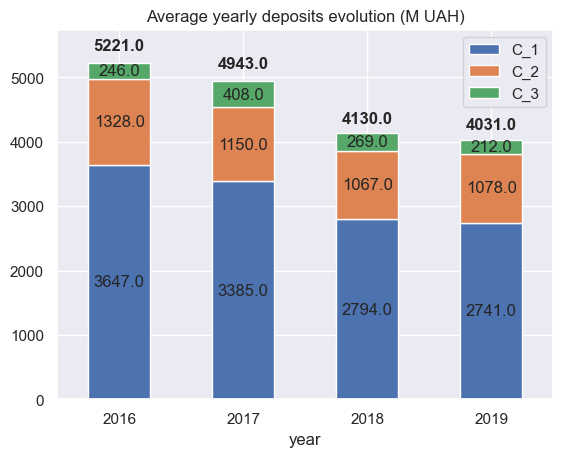

In [11]:
bar = df_avg_year.plot(kind='bar', stacked=True, title='Average yearly deposits evolution (M UAH)')

# add total values
for x,y in enumerate(df_avg_year.sum(axis=1)):
    bar.annotate(round(y,0), (x,y*1.04), ha='center', fontweight='bold')

# add labels for centers' values
for c in bar.containers:
    label = [round(v.get_height(),0) if v.get_height() > 0 else '' for v in c]
    bar.bar_label(c, labels=label, label_type='center')

# change the max y so all the labels are within the canvas
plt.ylim(top=df_avg_year.sum(axis=1).max()*1.1)

plt.xticks(rotation='horizontal')
plt.legend(loc='best')
plt.show()

Indeed, there is a clear <b>downtrend</b>, even though it started to stabilize in 2019 thanks to clients served in C_2 business center.

<a id='3.3.'></a>
## 3.3. Checking the deposits dynamic for UAH only

Since, deposits in foreign currency generate almost no income, our focus will be on deposits in UAH only. Let's check how these deposits changed over time.

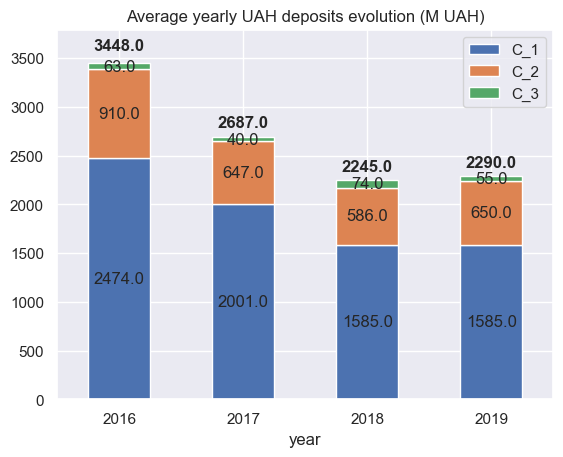

In [12]:
# average monthly deposits in UAH (local currency) only
df_center_uah = df[df['cur']=='LCY'].groupby(['year','month','center']).sum()['avg_deposit'].reset_index()

# now we can calculate the yearly averages
df_avg_year_uah = df_center_uah.groupby(['year','center']).mean()['avg_deposit'].reset_index()
df_avg_year_uah.head()

# pivot the DataFrame and then we can make a stacked bar chart from it
df_avg_year_uah = df_avg_year_uah.pivot(index='year', columns='center')['avg_deposit']
df_avg_year_uah.head()

# plotting the results
bar = df_avg_year_uah.plot(kind='bar', stacked=True, title='Average yearly UAH deposits evolution (M UAH)')

# add total values
for x,y in enumerate(df_avg_year_uah.sum(axis=1)):
    bar.annotate(round(y,0), (x,y*1.04), ha='center', fontweight='bold')

# add labels for centers' values
for c in bar.containers:
    label = [round(v.get_height(),0) if v.get_height() > 0 else '' for v in c]
    bar.bar_label(c, labels=label, label_type='center')

# change the max y so all the labels are within the canvas
plt.ylim(top=df_avg_year_uah.sum(axis=1).max()*1.1)

plt.xticks(rotation='horizontal')
plt.legend(loc='best')
plt.show()

Average deposits in UAH is slightly higher in 2019 comparing to 2018 (again thanks to clients served in C_2 business center). However, the difference is insufficient and it can change as the data for the remaining 3 months become available. Nevetherless, the <b>downtrend is present as well</b>.

<a id='4.'></a>
# 4. Analysis of clients deposits changes

Main assumptions for further analysis:
1. the analysis will be focused on 2018-2019 years, since 2016-2017 years have had different market conditions and not all of current clients had business relationship with the bank 2-3 years ago;
2. only deposits in UAH will be analyzed, since deposits in foreign currency generate almost no income for the bank;
3. the analysis will be conducted not on individual clients but on business groups to which they belong, since clients inside business groups are interconnected by joint ownership structure, management and economic activity - if, for example, management decides to change its core bank, the core bank will be change for every single legal entity inside the group.

<a id='4.1.'></a>
## 4.1. Preparing the DataFrame
Let's change the table to the above mentioned assumptions.

In [13]:
df_cli_analysis = df[(df['cur']=='LCY') & (df['year'].isin([2018,2019]))]
# calculate averages by groups - taking sum, since monthly data is already average
df_cli_analysis = df_cli_analysis.groupby(['year', 'month', 'date_rep', 'group']).sum()['avg_deposit'].reset_index()
df_cli_analysis.head()

,year,month,date_rep,group,avg_deposit
0,2018,1,2018-01-31,Group 1,68.126092
1,2018,1,2018-01-31,Group 10,0.017986
2,2018,1,2018-01-31,Group 100,0.047224
3,2018,1,2018-01-31,Group 101,10.561409
4,2018,1,2018-01-31,Group 102,0.982955


<a id='4.2.'></a>
## 4.2. Clients categorization
Let's group the clients based on how their average deposit volumes changed during 2 years. To do so, the averages for the first and last months will be compared.

In [14]:
first_m = np.min(df_cli_analysis['date_rep'])
last_m = np.max(df_cli_analysis['date_rep'])

df_cli_change = df_cli_analysis[df_cli_analysis['date_rep'].isin([first_m, last_m])]

# label the first and last months so they can be referenced despite that new dates might be added in the future
def first_last_m(x):
    if x == first_m:
        return 'first_month'
    elif x == last_m:
        return 'last_month'

df_cli_change['month_group'] = np.vectorize(first_last_m)(df_cli_change['date_rep'])
df_cli_change = df_cli_change.pivot(index='group', columns='month_group')['avg_deposit'].reset_index()
df_cli_change.head()

month_group,group,first_month,last_month
0,Group 1,68.126092,52.673538
1,Group 10,0.017986,NaN
2,Group 100,0.047224,0.082374
3,Group 101,10.561409,11.154832
4,Group 102,0.982955,1.065005


Replace NaN and add relative changes for comparison.

In [15]:
# here NaN means that business group is not client anymore or it doesn't have and deposit balance so it can be replaced with 0
df_cli_change = df_cli_change.fillna(0)
df_cli_change['percent_change'] = df_cli_change['last_month'] / df_cli_change['first_month'] * 100 - 100
df_cli_change.head()

month_group,group,first_month,last_month,percent_change
0,Group 1,68.126092,52.673538,-22.682284
1,Group 10,0.017986,0.000000,-100.000000
2,Group 100,0.047224,0.082374,74.432569
3,Group 101,10.561409,11.154832,5.618787
4,Group 102,0.982955,1.065005,8.347245


### Marking the first categories
Let's mark clients that started to have some deposits but didn't have them in the first month, and vice versa.

In [16]:
def new_gone(first, last):
    if first == 0 and last != 0:
        return 'New'
    elif first != 0 and last == 0:
        return 'Gone'
    else:
        return ''
    

df_cli_change['category'] = np.vectorize(new_gone)(df_cli_change['first_month'], df_cli_change['last_month'])
df_cli_change[df_cli_change['category'] != ''].head()

month_group,group,first_month,last_month,percent_change,category
1,Group 10,0.017986,0.000000,-100.0,Gone
9,Group 107,0.000000,0.051025,inf,New
13,Group 110,0.011892,0.000000,-100.0,Gone
24,Group 121,7.815739,0.000000,-100.0,Gone
30,Group 127,0.018279,0.000000,-100.0,Gone


### Marking the rest of categories
Let's mark the rest of clients (other than 'New' and 'Gone') based on their relative change. First, let's see how the percent changes are distributed.

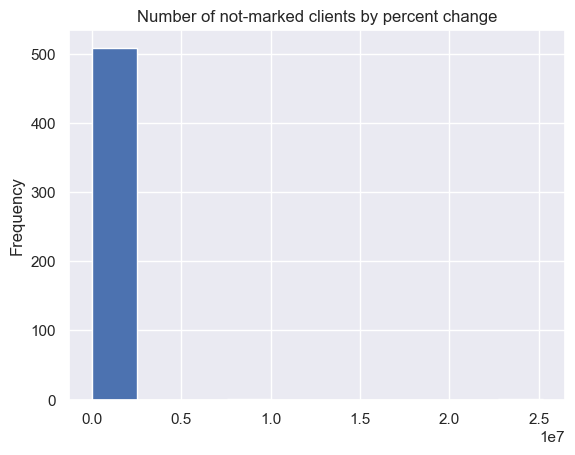

In [17]:
# define clients that are not marked
df_cli_change_other = df_cli_change[df_cli_change['category'] == '']
# set absolute values to the changes, so negative and positive change can be addressed simultaneously
df_cli_change_other['percent_change'] = np.abs(df_cli_change_other['percent_change'])

# plotting the histogram
df_cli_change_other['percent_change'].plot(kind='hist', bins=10, title='Number of not-marked clients by percent change')
plt.show()

The histogram doesn't tell much, because of clients with extreme changes (more than 100%), so let's see only those with changes not more than 100%.

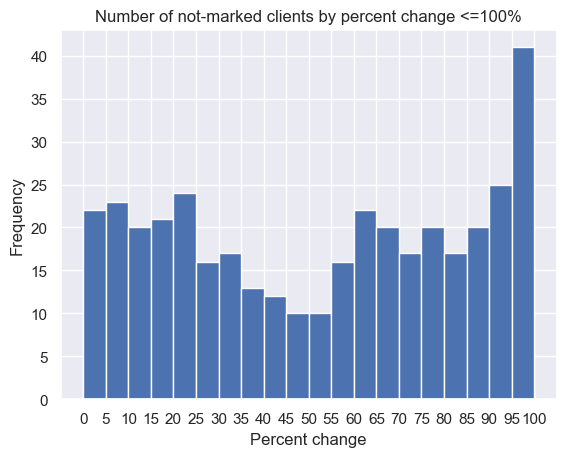

In [18]:
df_cli_change_other = df_cli_change_other[df_cli_change_other['percent_change'] <= 100]

df_cli_change_other['percent_change'].plot(kind='hist', bins=20, title='Number of not-marked clients by percent change <=100%')
plt.xticks(np.arange(0,101,5))
plt.xlabel('Percent change')
plt.show()

The large number of clients have changes not more than 25%, after which the number decreases sharply. Let's calculate the first quartile to see the bottom part and how it relates to the histogram.

In [19]:
df_cli_change_other['percent_change'].quantile(0.25)

22.38589155526809

25% of clients have changes not more than 22.4%. This corresponds to the histogram above. Let's round it to 20% and define clients with such change as stable.

<i>Note: if calculation was done on all clients (not only on those with change not more than 100%), the stable threshold would be much higher and more clients would fall into it, decreasing the number of those who can be worked with to improve the situation with deposits</i>

In [20]:
def cli_categ(first, last, change):
    if first == 0 and last != 0:
        return 'New'
    elif first != 0 and last == 0:
        return 'Gone'
    elif abs(change) <= 20:
        return 'Stable'
    elif change > 20:
        return 'Activated'
    else:
        return 'Deactivated'
    

df_cli_change['category'] = np.vectorize(cli_categ)(df_cli_change['first_month'], 
                                                    df_cli_change['last_month'], 
                                                    df_cli_change['percent_change'])
df_cli_change.head()

month_group,group,first_month,last_month,percent_change,category
0,Group 1,68.126092,52.673538,-22.682284,Deactivated
1,Group 10,0.017986,0.000000,-100.000000,Gone
2,Group 100,0.047224,0.082374,74.432569,Activated
3,Group 101,10.561409,11.154832,5.618787,Stable
4,Group 102,0.982955,1.065005,8.347245,Stable


### Visualizing deposit changes by clients categories
First, we need to add categories to the table with monthly data per business group and then we can visualize.

In [21]:
df_cli_analysis = pd.merge(df_cli_analysis, df_cli_change[['group', 'category']], how='left', on='group')
df_cli_analysis.head()

,year,month,date_rep,group,avg_deposit,category
0,2018,1,2018-01-31,Group 1,68.126092,Deactivated
1,2018,1,2018-01-31,Group 10,0.017986,Gone
2,2018,1,2018-01-31,Group 100,0.047224,Activated
3,2018,1,2018-01-31,Group 101,10.561409,Stable
4,2018,1,2018-01-31,Group 102,0.982955,Stable


In [22]:
cli_cat_vis = df_cli_analysis.groupby(['date_rep', 'category']).sum()['avg_deposit'].reset_index()
# pivot for further plotting
cli_cat_vis = cli_cat_vis.pivot(index='date_rep', columns='category')['avg_deposit']
# replace NaN for 'New' (first_month) and 'Gone' (last_month)
cli_cat_vis = cli_cat_vis.fillna(0)
cli_cat_vis.head()

category,Activated,Deactivated,Gone,New,Stable
date_rep,,,,,
2018-01-31,399.294858,1447.188425,87.129005,0.000000,229.266050
2018-02-28,429.721506,1084.447710,64.623581,11.305735,243.314384
2018-03-31,533.273913,1019.613876,54.795174,30.506783,257.209119
2018-04-30,600.570378,961.881971,46.999836,32.340294,278.616612
2018-05-31,723.748083,868.870212,46.121561,41.253122,298.678006


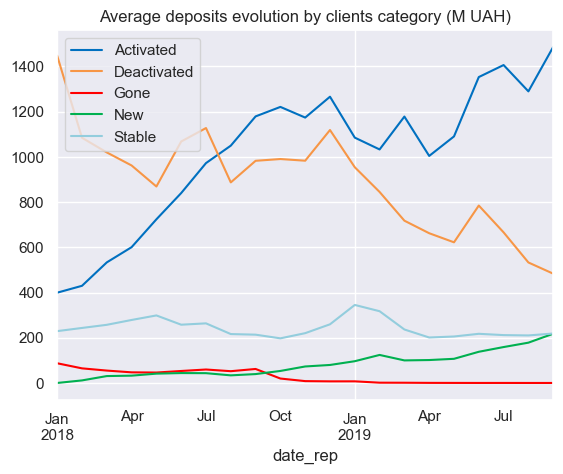

In [23]:
colors = {'Activated': '#0070C0', 'Deactivated': '#F79646', 'Stable': '#93CDDD', 'New': '#00B050', 'Gone': '#FF0000'}
cli_cat_vis.plot(kind='line', stacked=False, title='Average deposits evolution by clients category (M UAH)', color=colors)
plt.legend(loc='best')
plt.show()

The chart above depicts evolution by each category as expected. Let's also find the absolute changes in average deposits by category.

In [24]:
df_cli_change['absolute_change'] = df_cli_change['last_month'] - df_cli_change['first_month']
df_cli_change.groupby('category').agg({'absolute_change': ['sum', 'count']})

month_group absolute_change      
                        sum count
category                         
Activated       1086.701456   176
Deactivated     -963.813550   249
Gone             -87.129005    71
New              217.802563    86
Stable           -10.595291    86

During the analyzed 2 years, 249 clients significantly decreased their average deposits by 964M UAH. However, tt was well compensated by the substantial increase in average deposits by another 176 clients by 1087M UAH. Nevertherless, this <b>249 deactivated clients should be in primary focus for further analysis of the reasons of their deposits reduction and finding the possble approaches of their reactivation</b>.

Situtation with 'Gone' and 'New' clients are quite positive, as both the number of new clients and their average deposits outweigh the respective number and volumes of clients who left.

<a id='5.'></a>
# 5. Analysis of UAH incoming & outgoing payments

<a id='5.1.'></a>
## 5.1. Importing the new file 
Let's import the file with incoming & outgoing payments in UAH and make changes if necessary.

In [25]:
df_paym = pd.read_csv('UAH payments.csv')
df_paym.head()

,date_rep,center,group,uah_paym,paym_type,paym_direction
0,31.01.2018,C_3,Group 211,0.365218,To non-CB client in other bank,OUT
1,31.01.2018,C_3,Group 211,2.630709,To themselves in other bank,OUT
2,31.01.2018,C_3,Group 116,0.000114,Own money from other bank,IN
3,31.01.2018,C_3,Group 116,0.000041,To non-CB client in other bank,OUT
4,31.01.2018,C_3,Group 389,7.123874,Money from other bank,IN


In [26]:
df_paym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37345 entries, 0 to 37344
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_rep        37345 non-null  object 
 1   center          37345 non-null  object 
 2   group           37345 non-null  object 
 3   uah_paym        37345 non-null  float64
 4   paym_type       37345 non-null  object 
 5   paym_direction  37345 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


Converting 'date_rep' column to date data type and adding new columns for further work.

In [27]:
df_paym['date_rep'] = pd.to_datetime(df_paym['date_rep'], format='%d.%m.%Y')
df_paym['year'] = df_paym['date_rep'].dt.year
df_paym['month'] = df_paym['date_rep'].dt.month

Finding unique values in 'paym_direction' and 'paym_type' columns for further referencing.

In [28]:
df_paym[['paym_direction', 'paym_type']].drop_duplicates().sort_values('paym_direction')

,paym_direction,paym_type
2,IN,Own money from other bank
4,IN,Money from other bank
0,OUT,To non-CB client in other bank
1,OUT,To themselves in other bank
6,OUT,To CB client in other bank


The file contains only external payments, i.e. no payments from/to other banks and no intrabank payments.

Checking that 'uah_paym' column contains <u>monthly</u> payments as it should.

In [29]:
# count unique dates in each month
date_check = df_paym.groupby(['year', 'month']).nunique()['date_rep'].reset_index()
# sum of unique dates in eqch year
date_check.groupby(['year']).sum()['date_rep'].reset_index()

,year,date_rep
0,2018,12
1,2019,9


Each month contains exactly 1 date. So 'uah_paym' column is indeed has the monthly payment volumes. 

<a id='5.2.'></a>
## 5.2. Analysis of outgoing payments
Let's analyze the dynamic of outgoing payments for 2 years.

### Visualizing the dynamic of outgoing payments for 2 years

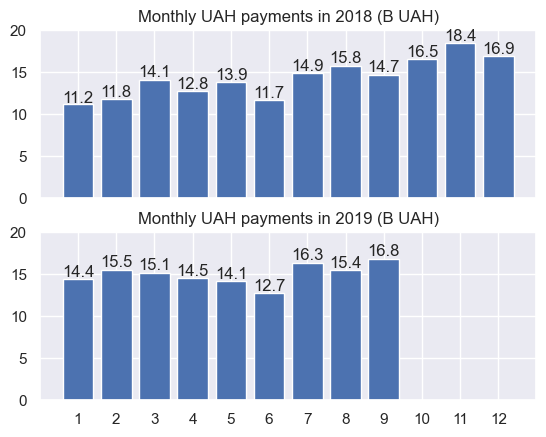

In [30]:
df_paym_out = df_paym[df_paym['paym_direction'] == 'OUT']

# creating 2 DataFrames for separate charts (/1000 is for better visualization purposes)
df_paym_out_prev_year = df_paym_out[df_paym_out['year'] == np.min(df_paym_out['year'])].groupby('month').sum()['uah_paym']/1000
df_paym_out_cur_year = df_paym_out[df_paym_out['year'] == np.max(df_paym_out['year'])].groupby('month').sum()['uah_paym']/1000

# ploting 2 charts simultaneously
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

# previous year
ax1.bar(df_paym_out_prev_year.index, df_paym_out_prev_year)
ax1.set_title('Monthly UAH payments in 2018 (B UAH)')
for i,v in enumerate(df_paym_out_prev_year):
    ax1.text(i+1, v*1.02, round(v,1), ha='center')

# current year
ax2.bar(df_paym_out_cur_year.index, df_paym_out_cur_year)
ax2.set_title('Monthly UAH payments in 2019 (B UAH)')
for i,v in enumerate(df_paym_out_cur_year):
    ax2.text(i+1, v*1.02, round(v,1), ha='center')

# increase y axis to avoid overlapping bars with the title
max_value = np.max([df_paym_out_prev_year.max(), df_paym_out_cur_year.max()]) * 1.3
ax1.set_yticks(np.arange(0, max_value, 5))
ax2.set_yticks(np.arange(0, max_value, 5))

plt.xticks(np.arange(1,13))
plt.show()

In 2019, clients make higher monthly payments than year before. Let's calculate exactly how much higher.

In [31]:
cur_month = df_paym_out_cur_year.index[-1]
abs_dif = round(df_paym_out_cur_year.sum() - df_paym_out_prev_year.iloc[:cur_month].sum(), 1)
rel_dif = '{:.1%}'.format(df_paym_out_cur_year.sum() / df_paym_out_prev_year.iloc[:cur_month].sum() -1)
print(f'For {cur_month}M 2019, clients made {abs_dif}B UAH more payments compared to {cur_month}M 2018, which is more by {rel_dif}.')

For 9M 2019, clients made 14.0B UAH more payments compared to 9M 2018, which is more by 11.6%.


### Visualizing the outgoing payments by types of payments

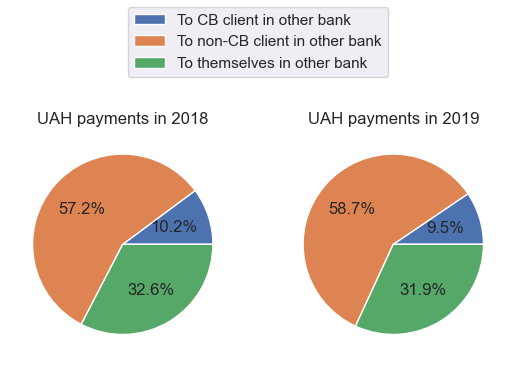

In [32]:
df_paym_out_type = df_paym_out.groupby(['year', 'paym_type']).sum()['uah_paym'].reset_index()
df_paym_out_type = df_paym_out_type.pivot(index='year', columns='paym_type', values='uah_paym')

# creating 2 DataFrames for separate charts
df_paym_out_type_prev_year = df_paym_out_type.loc[df_paym_out_type.index[0]]
df_paym_out_type_cur_year = df_paym_out_type.loc[df_paym_out_type.index[-1]]

# plotting 2 pie charts
fig, (ax1, ax2) = plt.subplots(1,2)

# previous year
ax1.pie(df_paym_out_type_prev_year, autopct='%.1f%%')
ax1.set_title('UAH payments in 2018')

# current year
ax2.pie(df_paym_out_type_cur_year, autopct='%.1f%%')
ax2.set_title('UAH payments in 2019')

fig.legend(df_paym_out_type_prev_year.index, loc='upper center')
plt.show()

Comparing 2 years, the shares of types are relatively the same.<br>
The vast majority of payments are made to non-CB clients.<br>
At the same time, the big portion of money goes to clients' own accounts in other banks. <b>Additional investigation of why clients want to send money to other banks instead of using accounts in our bank should be made.</b><br>
In addition, 10% of payments are being made to counterparties that have open accounts in Corporate Banking and this payments, if done within our bank, wouldn't have any impact on our liquidity. <b>Need to communicate with clients via relationship managers about the possibility of making payments to certain counterparties to accounts open in our bank.</b>

### Calculating the number of clients and amount of their payments within each payment type

In [33]:
df_paym_out_cli = df_paym_out.groupby(['year', 'group', 'paym_type']).sum()['uah_paym'].reset_index()

# calculate total yearly payments by all calegories
df_paym_out_cli_total = df_paym_out.groupby(['year', 'group']).sum()['uah_paym'].reset_index()
df_paym_out_cli_total['paym_type'] = 'total_paym'
# reorder columns for further concatenation
df_paym_out_cli_total = df_paym_out_cli_total.reindex(columns=['year', 'group', 'paym_type', 'uah_paym'])

# add total payments to payments by types
df_paym_out_cli = pd.concat([df_paym_out_cli, df_paym_out_cli_total])

# pivot the payment types to columns
df_paym_out_cli = df_paym_out_cli.pivot(index=['year', 'group'], columns='paym_type', values='uah_paym').reset_index()
df_paym_out_cli.head()

paym_type,year,group,To CB client in other bank,To non-CB client in other bank,To themselves in other bank,total_paym
0,2018,Group 1,863.286793,428.377977,303.818570,1595.483339
1,2018,Group 100,0.015044,2.470745,NaN,2.485789
2,2018,Group 101,0.397416,78.729430,1.523550,80.650395
3,2018,Group 102,1.119464,145.965691,0.223326,147.308481
4,2018,Group 103,21.027893,452.961317,17.056891,491.046101


Let's summarize payments by grouping them in tiers. For simplicity, let's calculate the total amount of payments each client does during the year and put them into tiers each representing 20% of that payments.

In [34]:
q_20 = df_paym_out_cli['total_paym'].quantile(0.2)
q_40 = df_paym_out_cli['total_paym'].quantile(0.4)
q_60 = df_paym_out_cli['total_paym'].quantile(0.6)
q_80 = df_paym_out_cli['total_paym'].quantile(0.8)
q_100 = df_paym_out_cli['total_paym'].quantile(1)

conditions = [df_paym_out_cli['total_paym'] <= q_20,
              df_paym_out_cli['total_paym'] <= q_40,
              df_paym_out_cli['total_paym'] <= q_60,
              df_paym_out_cli['total_paym'] <= q_80,
              df_paym_out_cli['total_paym'] <= q_100
             ]
output_value = ['<=' + str(round(q_20,1)) + 'M UAH', 
                str(round(q_20,1)) + 'M UAH - ' + str(round(q_40,1)) + 'M UAH',
                str(round(q_40,1)) + 'M UAH - ' + str(round(q_60,1)) + 'M UAH',
                str(round(q_60,1)) + 'M UAH - ' + str(round(q_80,1)) + 'M UAH',
                '>' + str(round(q_80,1)) + 'M UAH'
               ]
output_q = range(20,120,20)

df_paym_out_cli['tier'] = np.select(conditions, output_value)
df_paym_out_cli['quantile'] = np.select(conditions, output_q)

df_paym_out_cli.head()

paym_type,year,group,To CB client in other bank,To non-CB client in other bank,To themselves in other bank,total_paym,tier,quantile
0,2018,Group 1,863.286793,428.377977,303.818570,1595.483339,>189.5M UAH,100
1,2018,Group 100,0.015044,2.470745,NaN,2.485789,2.0M UAH - 12.6M UAH,40
2,2018,Group 101,0.397416,78.729430,1.523550,80.650395,54.7M UAH - 189.5M UAH,80
3,2018,Group 102,1.119464,145.965691,0.223326,147.308481,54.7M UAH - 189.5M UAH,80
4,2018,Group 103,21.027893,452.961317,17.056891,491.046101,>189.5M UAH,100


In [35]:
df_paym_out_cli = df_paym_out_cli.groupby(['year', 'tier', 'quantile']).agg({'group': 'nunique',
                                                                             'To themselves in other bank': 'sum',
                                                                             'To CB client in other bank': 'sum',
                                                                             'To non-CB client in other bank': 'sum',
                                                                             'total_paym': 'sum'}).reset_index()
df_paym_out_cli.head()

paym_type,year,tier,quantile,group,To themselves in other bank,To CB client in other bank,To non-CB client in other bank,total_paym
0,2018,12.6M UAH - 54.7M UAH,60,107,993.352858,96.128135,2037.362208,3126.843201
1,2018,2.0M UAH - 12.6M UAH,40,106,178.277545,23.731866,444.906717,646.916127
2,2018,54.7M UAH - 189.5M UAH,80,125,4212.076670,764.129574,8236.657516,13212.863760
3,2018,<=2.0M UAH,20,107,11.875163,1.597399,52.199003,65.671564
4,2018,>189.5M UAH,100,119,50913.578363,16664.283463,88042.999591,155620.861417


Adding the percentage share of each tier's total payments in the total payments for each year.

In [36]:
total_year_paym = df_paym_out_cli.groupby('year').transform('sum')['total_paym']
df_paym_out_cli['total_paym_share'] = df_paym_out_cli.apply(lambda row: '{:.0%}'.format(row['total_paym'] / 
                                                                                        total_year_paym[row.name]), axis=1)
df_paym_out_cli.head()

paym_type,year,tier,quantile,group,To themselves in other bank,To CB client in other bank,To non-CB client in other bank,total_paym,total_paym_share
0,2018,12.6M UAH - 54.7M UAH,60,107,993.352858,96.128135,2037.362208,3126.843201,2%
1,2018,2.0M UAH - 12.6M UAH,40,106,178.277545,23.731866,444.906717,646.916127,0%
2,2018,54.7M UAH - 189.5M UAH,80,125,4212.076670,764.129574,8236.657516,13212.863760,8%
3,2018,<=2.0M UAH,20,107,11.875163,1.597399,52.199003,65.671564,0%
4,2018,>189.5M UAH,100,119,50913.578363,16664.283463,88042.999591,155620.861417,90%


Adding percentage shares of payment types in total tier's payments and formating the table.

In [37]:
def perc_share(x, total):
    return '{:.0%}'.format(x / total)

for column in ['To themselves in other bank', 'To CB client in other bank', 'To non-CB client in other bank']:
    df_paym_out_cli[column] = np.vectorize(perc_share)(df_paym_out_cli[column], df_paym_out_cli['total_paym'])

# rounding total payments for better visualization purposes
df_paym_out_cli['total_paym'] = np.round(df_paym_out_cli['total_paym'], 0).astype('int')
# sorting by tiers - from top to bottom
df_paym_out_cli = df_paym_out_cli.sort_values(by=['year', 'quantile'], ascending=False)

In [38]:
df_paym_out_cli_prev = df_paym_out_cli[df_paym_out_cli['year'] == df_paym_out_cli['year'].min()]
df_paym_out_cli_cur = df_paym_out_cli[df_paym_out_cli['year'] == df_paym_out_cli['year'].max()]

display(df_paym_out_cli_prev.style.hide(axis='index'), df_paym_out_cli_cur.style.hide(axis='index'))

year,tier,quantile,group,To themselves in other bank,To CB client in other bank,To non-CB client in other bank,total_paym,total_paym_share
2018,>189.5M UAH,100,119,33%,11%,57%,155621,90%
2018,54.7M UAH - 189.5M UAH,80,125,32%,6%,62%,13213,8%
2018,12.6M UAH - 54.7M UAH,60,107,32%,3%,65%,3127,2%
2018,2.0M UAH - 12.6M UAH,40,106,28%,4%,69%,647,0%
2018,<=2.0M UAH,20,107,18%,2%,79%,66,0%


year,tier,quantile,group,To themselves in other bank,To CB client in other bank,To non-CB client in other bank,total_paym,total_paym_share
2019,>189.5M UAH,100,109,32%,10%,58%,120276,89%
2019,54.7M UAH - 189.5M UAH,80,103,31%,11%,58%,10327,8%
2019,12.6M UAH - 54.7M UAH,60,120,32%,4%,64%,3381,3%
2019,2.0M UAH - 12.6M UAH,40,122,25%,3%,72%,780,1%
2019,<=2.0M UAH,20,121,20%,4%,75%,81,0%


<b>There is a high concentration of payments: almost 20% of clients make 90% of total payments.</b> It is important to note that among clients who make more than 60% of payments in 2019 (taking into account payments done by each client separately), the share of counterparties who are clients of Corporate Banking has increased. <b>We should definitely capitalize on that and work with these clients to encourage them to make payments to accounts in our bank.</b><br>
Interestingly, clients who make not more than 40% of payments (taking into account payments done by each client separately) have lower share of payments transfered to themselves in other bank which may correspond to the fact that for the big part of them we are the core bank.

<a id='5.3.'></a>
## 5.3. Analysis of incoming payments

Let's make similar analysis of the dynamic of incoming payments for 2 years. And see how that compares with the outgoing payments.

### Visualizing the dynamic of incoming payments for 2 years

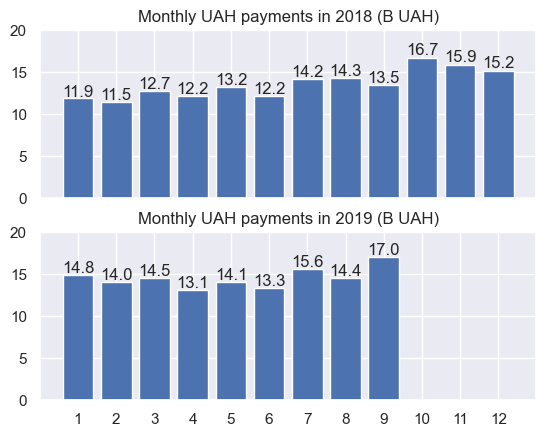

In [39]:
df_paym_in = df_paym[df_paym['paym_direction'] == 'IN']

# creating 2 DataFrames for separate charts (/1000 is for better visualization purposes)
df_paym_in_prev_year = df_paym_in[df_paym_in['year'] == np.min(df_paym_in['year'])].groupby('month').sum()['uah_paym']/1000
df_paym_in_cur_year = df_paym_in[df_paym_in['year'] == np.max(df_paym_in['year'])].groupby('month').sum()['uah_paym']/1000

# ploting 2 charts simultaneously
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

# previous year
ax1.bar(df_paym_in_prev_year.index, df_paym_in_prev_year)
ax1.set_title('Monthly UAH payments in 2018 (B UAH)')
for i,v in enumerate(df_paym_in_prev_year):
    ax1.text(i+1, v*1.02, round(v,1), ha='center')

# current year
ax2.bar(df_paym_in_cur_year.index, df_paym_in_cur_year)
ax2.set_title('Monthly UAH payments in 2019 (B UAH)')
for i,v in enumerate(df_paym_in_cur_year):
    ax2.text(i+1, v*1.02, round(v,1), ha='center')

# inrease y axis to avoid overlapping bars with the title
max_value = np.max([df_paym_in_prev_year.max(), df_paym_in_cur_year.max()]) * 1.3
ax1.set_yticks(np.arange(0, max_value, 5))
ax2.set_yticks(np.arange(0, max_value, 5))

plt.xticks(np.arange(1,13))
plt.show()

In 2019, clients receive higher monthly payments than year before. Let's calculate exactly how much higher.

In [40]:
cur_month = df_paym_in_cur_year.index[-1]
abs_dif = round(df_paym_in_cur_year.sum() - df_paym_in_prev_year.iloc[:cur_month].sum(), 1)
rel_dif = '{:.1%}'.format(df_paym_in_cur_year.sum() / df_paym_in_prev_year.iloc[:cur_month].sum() -1)
print(f'For {cur_month}M 2019, clients received {abs_dif}B UAH more payments compared to {cur_month}M 2018, which is more by {rel_dif}.')

For 9M 2019, clients received 15.0B UAH more payments compared to 9M 2018, which is more by 13.0%.


Comparing to outgoing payments, clients received more incoming payments by 1B UAH. This correlates with the increase in average monthly deposit volumes that are observed in 2019.

### Visualizing the incoming payments by types of payments

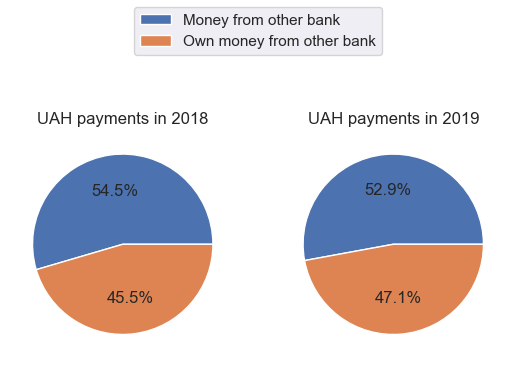

In [41]:
df_paym_in_type = df_paym_in.groupby(['year', 'paym_type']).sum()['uah_paym'].reset_index()
df_paym_in_type = df_paym_in_type.pivot(index='year', columns='paym_type', values='uah_paym')

# creating 2 DataFrames for separate charts
df_paym_in_type_prev_year = df_paym_in_type.loc[df_paym_in_type.index[0]]
df_paym_in_type_cur_year = df_paym_in_type.loc[df_paym_in_type.index[-1]]

# plotting 2 pie charts
fig, (ax1, ax2) = plt.subplots(1,2)

# previous year
ax1.pie(df_paym_in_type_prev_year, autopct='%.1f%%')
ax1.set_title('UAH payments in 2018')

# current year
ax2.pie(df_paym_in_type_cur_year, autopct='%.1f%%')
ax2.set_title('UAH payments in 2019')

fig.legend(df_paym_in_type_prev_year.index, loc='upper center')
plt.show()

Comparing 2 years, the shares of types are relatively the same. It is important to note that almost 50% of money clients received as they own money that has been accumulated on their accounts in other banks. <b>We should work with such clients to encourage them to use our bank as a core one and thus to take advantage of use of all that funds rather than some portion of it.</b>

### Calculating the number of clients and amount of their payments within each payment type

In [42]:
df_paym_in_cli = df_paym_in.groupby(['year', 'group', 'paym_type']).sum()['uah_paym'].reset_index()

# calculate total yearly payments by all calegories
df_paym_in_cli_total = df_paym_in.groupby(['year', 'group']).sum()['uah_paym'].reset_index()
df_paym_in_cli_total['paym_type'] = 'total_paym'
# reorder columns for further concatenation
df_paym_in_cli_total = df_paym_in_cli_total.reindex(columns=['year', 'group', 'paym_type', 'uah_paym'])

# add total payments to payments by types
df_paym_in_cli = pd.concat([df_paym_in_cli, df_paym_in_cli_total])

# pivot the payment types to columns
df_paym_in_cli = df_paym_in_cli.pivot(index=['year', 'group'], columns='paym_type', values='uah_paym').reset_index()
df_paym_in_cli.head()

paym_type,year,group,Money from other bank,Own money from other bank,total_paym
0,2018,Group 1,745.380457,1337.932943,2083.313400
1,2018,Group 100,0.914680,NaN,0.914680
2,2018,Group 101,75.321876,NaN,75.321876
3,2018,Group 102,62.291163,0.231218,62.522381
4,2018,Group 103,355.821453,151.337844,507.159298


Let's summarize payments by grouping them in tiers. For simplicity, let's calculate the total amount of payments each client receives during the year and put them into tiers each representing 20% of that payments.

In [43]:
q_20 = df_paym_in_cli['total_paym'].quantile(0.2)
q_40 = df_paym_in_cli['total_paym'].quantile(0.4)
q_60 = df_paym_in_cli['total_paym'].quantile(0.6)
q_80 = df_paym_in_cli['total_paym'].quantile(0.8)
q_100 = df_paym_in_cli['total_paym'].quantile(1)

conditions = [df_paym_in_cli['total_paym'] <= q_20,
              df_paym_in_cli['total_paym'] <= q_40,
              df_paym_in_cli['total_paym'] <= q_60,
              df_paym_in_cli['total_paym'] <= q_80,
              df_paym_in_cli['total_paym'] <= q_100
             ]
output_value = ['<=' + str(round(q_20,1)) + 'M UAH', 
                str(round(q_20,1)) + 'M UAH - ' + str(round(q_40,1)) + 'M UAH',
                str(round(q_40,1)) + 'M UAH - ' + str(round(q_60,1)) + 'M UAH',
                str(round(q_60,1)) + 'M UAH - ' + str(round(q_80,1)) + 'M UAH',
                '>' + str(round(q_80,1)) + 'M UAH'
               ]
output_q = range(20,120,20)

df_paym_in_cli['tier'] = np.select(conditions, output_value)
df_paym_in_cli['quantile'] = np.select(conditions, output_q)

df_paym_in_cli.head()

paym_type,year,group,Money from other bank,Own money from other bank,total_paym,tier,quantile
0,2018,Group 1,745.380457,1337.932943,2083.313400,>233.9M UAH,100
1,2018,Group 100,0.914680,NaN,0.914680,<=2.4M UAH,20
2,2018,Group 101,75.321876,NaN,75.321876,73.4M UAH - 233.9M UAH,80
3,2018,Group 102,62.291163,0.231218,62.522381,18.7M UAH - 73.4M UAH,60
4,2018,Group 103,355.821453,151.337844,507.159298,>233.9M UAH,100


In [44]:
df_paym_in_cli = df_paym_in_cli.groupby(['year', 'tier', 'quantile']).agg({'group': 'nunique',
                                                                           'Money from other bank': 'sum',
                                                                           'Own money from other bank': 'sum',
                                                                           'total_paym': 'sum'}).reset_index()
df_paym_in_cli.head()

paym_type,year,tier,quantile,group,Money from other bank,Own money from other bank,total_paym
0,2018,18.7M UAH - 73.4M UAH,60,100,3053.575157,1288.342080,4341.917238
1,2018,2.4M UAH - 18.7M UAH,40,96,495.610487,354.666145,850.276632
2,2018,73.4M UAH - 233.9M UAH,80,112,10675.707825,4763.597957,15439.305782
3,2018,<=2.4M UAH,20,112,28.276665,19.477287,47.753951
4,2018,>233.9M UAH,100,119,74895.339312,67862.774621,142758.113933


Adding the percentage share of each tier's total payments in the total payments for each year.

In [45]:
total_year_paym = df_paym_in_cli.groupby('year').transform('sum')['total_paym']
df_paym_in_cli['total_paym_share'] = df_paym_in_cli.apply(lambda row: '{:.0%}'.format(row['total_paym'] / 
                                                                                      total_year_paym[row.name]), axis=1)
df_paym_in_cli.head()

paym_type,year,tier,quantile,group,Money from other bank,Own money from other bank,total_paym,total_paym_share
0,2018,18.7M UAH - 73.4M UAH,60,100,3053.575157,1288.342080,4341.917238,3%
1,2018,2.4M UAH - 18.7M UAH,40,96,495.610487,354.666145,850.276632,1%
2,2018,73.4M UAH - 233.9M UAH,80,112,10675.707825,4763.597957,15439.305782,9%
3,2018,<=2.4M UAH,20,112,28.276665,19.477287,47.753951,0%
4,2018,>233.9M UAH,100,119,74895.339312,67862.774621,142758.113933,87%


Adding percentage shares of payment types in total tier's payments and formating the table.

In [46]:
def perc_share(x, total):
    return '{:.0%}'.format(x / total)

for column in ['Money from other bank', 'Own money from other bank']:
    df_paym_in_cli[column] = np.vectorize(perc_share)(df_paym_in_cli[column], df_paym_in_cli['total_paym'])

# rounding total payments for better visualization purposes
df_paym_in_cli['total_paym'] = np.round(df_paym_in_cli['total_paym'], 0).astype('int')
# sorting by tiers - from top to bottom
df_paym_in_cli = df_paym_in_cli.sort_values(by=['year', 'quantile'], ascending=False)

In [47]:
df_paym_in_cli_prev = df_paym_in_cli[df_paym_in_cli['year'] == df_paym_in_cli['year'].min()]
df_paym_in_cli_cur = df_paym_in_cli[df_paym_in_cli['year'] == df_paym_in_cli['year'].max()]

display(df_paym_in_cli_prev.style.hide(axis='index'), df_paym_in_cli_cur.style.hide(axis='index'))

year,tier,quantile,group,Money from other bank,Own money from other bank,total_paym,total_paym_share
2018,>233.9M UAH,100,119,52%,48%,142758,87%
2018,73.4M UAH - 233.9M UAH,80,112,69%,31%,15439,9%
2018,18.7M UAH - 73.4M UAH,60,100,70%,30%,4342,3%
2018,2.4M UAH - 18.7M UAH,40,96,58%,42%,850,1%
2018,<=2.4M UAH,20,112,59%,41%,48,0%


year,tier,quantile,group,Money from other bank,Own money from other bank,total_paym,total_paym_share
2019,>233.9M UAH,100,96,50%,50%,110911,85%
2019,73.4M UAH - 233.9M UAH,80,103,67%,33%,13992,11%
2019,18.7M UAH - 73.4M UAH,60,115,64%,36%,4708,4%
2019,2.4M UAH - 18.7M UAH,40,119,64%,36%,1077,1%
2019,<=2.4M UAH,20,104,56%,44%,49,0%


Once again, <b>there is a high concentration of payments: almost 20% of clients receive almost 90% of total payments.</b> It is important to note that among clients who receive more than 80% of payments (taking into account payments received by each client separately), share of own money transfers is around 50% which is way more than for clients with smaller payments. <b> Such clients should be in primary focus for further work on encouragement of using our bank as a core one.</b>

<a id='6.'></a>
# 6. Potential average deposits increase

For the purpose of calculating the potential increase of average deposits, we will focus on the <b>outgoing payments (specifically on payments to themselves and to CB clients)</b>. Despite that clients also receive large amount of money from their own accounts in other banks, we don't know the exact amount of money that are accumulated in other banks and thus can't make a valid calculations.

<a id='6.1.'></a>
## 6.1. Preparing the table

In [48]:
df_paym[['paym_direction', 'paym_type']].drop_duplicates().sort_values('paym_direction')

,paym_direction,paym_type
2,IN,Own money from other bank
4,IN,Money from other bank
0,OUT,To non-CB client in other bank
1,OUT,To themselves in other bank
6,OUT,To CB client in other bank


In [49]:
df_paym_potential = df_paym[(df_paym['paym_direction'] == 'OUT') &
                            (df_paym['paym_type'].isin(['To themselves in other bank', 'To CB client in other bank']))]
df_paym_potential.head()

,date_rep,center,group,uah_paym,paym_type,paym_direction,year,month
1,2018-01-31,C_3,Group 211,2.630709,To themselves in other bank,OUT,2018,1
6,2018-01-31,C_3,Group 389,8.884983,To CB client in other bank,OUT,2018,1
8,2018-01-31,C_3,Group 389,9.690094,To themselves in other bank,OUT,2018,1
12,2018-01-31,C_3,Group 368,13.075877,To CB client in other bank,OUT,2018,1
16,2018-01-31,C_3,Group 39,0.036370,To CB client in other bank,OUT,2018,1


Adding clients categories based on how their average deposits changed over 2 years.

In [50]:
df_cli_change.head()

month_group,group,first_month,last_month,percent_change,category,absolute_change
0,Group 1,68.126092,52.673538,-22.682284,Deactivated,-15.452554
1,Group 10,0.017986,0.000000,-100.000000,Gone,-0.017986
2,Group 100,0.047224,0.082374,74.432569,Activated,0.035150
3,Group 101,10.561409,11.154832,5.618787,Stable,0.593423
4,Group 102,0.982955,1.065005,8.347245,Stable,0.082050


In [51]:
df_paym_potential = pd.merge(df_paym_potential, df_cli_change[['group', 'category']], on='group', how='left')

Removing clients with 'Gone' category because they have already left us and only their reactivation would require a completely separate strategy.<br>
<i>If we leave them, this will have a negative impact on further calculations, especially if they had extreme outgoing payments (high or low).</i>

In [52]:
df_paym_potential = df_paym_potential[df_paym_potential['category'] != 'Gone']

<a id='6.2.'></a>
## 6.2. Calculating the potential increase

Let's calculate the average daily payments client make each year. We need daily payments because average monthly deposits are made up of the deposit volumes clients have on average every day during the month.

In [53]:
# average daily payments for each month
df_paym_potential['uah_paym'] = df_paym_potential['uah_paym'] / df_paym_potential['date_rep'].dt.day
# average daily payments for each year
df_paym_potential = df_paym_potential.groupby(['year', 'group', 'paym_type'])['uah_paym'].mean().reset_index()

df_paym_potential.head()

,year,group,paym_type,uah_paym
0,2018,Group 1,To CB client in other bank,2.341913
1,2018,Group 1,To themselves in other bank,0.827690
2,2018,Group 100,To CB client in other bank,0.000063
3,2018,Group 101,To CB client in other bank,0.001084
4,2018,Group 101,To themselves in other bank,0.004218


### Visualizing the distribution of average daily payments

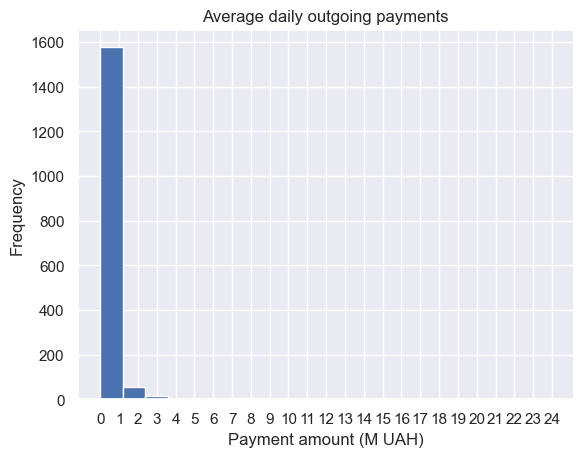

In [54]:
df_paym_potential['uah_paym'].plot(kind='hist', bins=20)
plt.xticks(np.arange(0, df_paym_potential['uah_paym'].max()+1, 1))
plt.xlabel('Payment amount (M UAH)')
plt.title('Average daily outgoing payments')
plt.show()

The vast majority of daily payments don't exceed 1M UAH. Let's filter this out to better see the distribution of other payments.

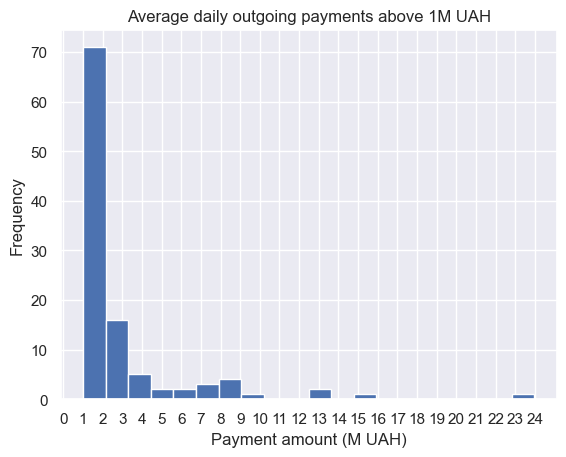

In [55]:
df_paym_potential_more1m = df_paym_potential[df_paym_potential['uah_paym'] > 1]

df_paym_potential_more1m['uah_paym'].plot(kind='hist', bins=20)
plt.xticks(np.arange(0, df_paym_potential_more1m['uah_paym'].max()+1, 1))
plt.xlabel('Payment amount (M UAH)')
plt.title('Average daily outgoing payments above 1M UAH')
plt.show()

Let's also see the distribution of payments of no more than 1M UAH.

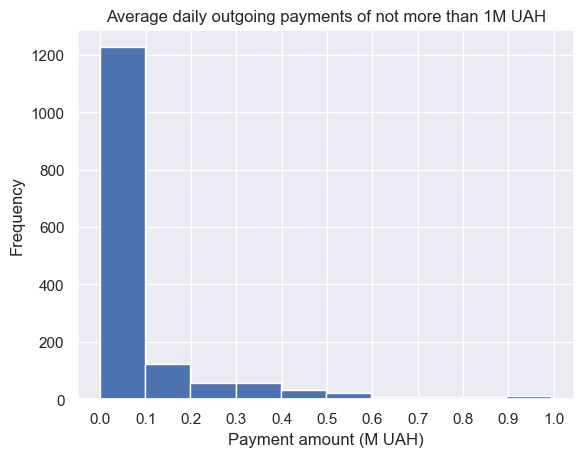

In [56]:
df_paym_potential_1m = df_paym_potential[df_paym_potential['uah_paym'] <= 1]

df_paym_potential_1m['uah_paym'].plot(kind='hist', bins=10)
plt.xticks(np.arange(0, 1.01, 0.1))
plt.xlabel('Payment amount (M UAH)')
plt.title('Average daily outgoing payments of not more than 1M UAH')
plt.show()

The vast majority of daily payments don't exceed 0.1M UAH. Also, there is a large concentration of small payments between 0.1M UAH to 0.2M UAH.

### Grouping payments
Let's group payments into 4 tiers for simplicity:<br>
1. first tier - payments of no more than 0.2M UAH;
2. second tier - payments between 0.2M UAH and 1M UAH;
3. third and forth tiers - payments above 1M UAH split by the median.

In [57]:
median = df_paym_potential_more1m['uah_paym'].median()

conditions = [df_paym_potential['uah_paym'] <= 0.2,
              df_paym_potential['uah_paym'] <= 1,
              df_paym_potential['uah_paym'] <= median,
              df_paym_potential['uah_paym'] > median
             ]
output_value = ['<=0.2M UAH', 
                '0.2M UAH - 1M UAH',
                '1M UAH - ' + str(round(median,1)) + 'M UAH',
                '>' + str(round(median,1)) + 'M UAH'
               ]
output_order = [0,1,50,100]
df_paym_potential['tier'] = np.select(conditions, output_value)
df_paym_potential['order'] = np.select(conditions, output_order)

# rename column
df_paym_potential = df_paym_potential.rename(columns={'uah_paym': 'avg_potential'})

df_paym_potential.head()

,year,group,paym_type,avg_potential,tier,order
0,2018,Group 1,To CB client in other bank,2.341913,>1.7M UAH,100
1,2018,Group 1,To themselves in other bank,0.827690,0.2M UAH - 1M UAH,1
2,2018,Group 100,To CB client in other bank,0.000063,<=0.2M UAH,0
3,2018,Group 101,To CB client in other bank,0.001084,<=0.2M UAH,0
4,2018,Group 101,To themselves in other bank,0.004218,<=0.2M UAH,0


Separating payment categories for the current year.

In [58]:
df_paym_potential_cur_cli = df_paym_potential[(df_paym_potential['year'] == df_paym_potential['year'].max()) &
                                              (df_paym_potential['paym_type'] == 'To CB client in other bank')]
df_paym_potential_cur_own = df_paym_potential[(df_paym_potential['year'] == df_paym_potential['year'].max()) &
                                              (df_paym_potential['paym_type'] == 'To themselves in other bank')]

Summarizing payment categories for current year.

In [59]:
df_paym_potential_cur_cli = df_paym_potential_cur_cli.groupby(['order', 'tier']).agg({'group': 'count', 'avg_potential': 'sum'})
df_paym_potential_cur_cli = df_paym_potential_cur_cli.reset_index().sort_values('order', ascending=False)

df_paym_potential_cur_own = df_paym_potential_cur_own.groupby(['order', 'tier']).agg({'group': 'count', 'avg_potential': 'sum'})
df_paym_potential_cur_own = df_paym_potential_cur_own.reset_index().sort_values('order', ascending=False)

cur_style_own = df_paym_potential_cur_own.style.set_caption('Avg deposits increase based on money transfered to themselves in 2019 (M UAH)')
cur_style_cli = df_paym_potential_cur_cli.style.set_caption('Avg deposits increase based on money transfered to CB clients in 2019 (M UAH)')

display(cur_style_own, cur_style_cli)

,order,tier,group,avg_potential
3,100,>1.7M UAH,23,103.210430
2,50,1M UAH - 1.7M UAH,18,23.988717
1,1,0.2M UAH - 1M UAH,74,32.255481
0,0,<=0.2M UAH,323,13.598538


,order,tier,group,avg_potential
3,100,>1.7M UAH,4,17.837823
2,50,1M UAH - 1.7M UAH,8,10.522359
1,1,0.2M UAH - 1M UAH,27,12.709097
0,0,<=0.2M UAH,379,7.034838


<b>For initial work it is worth focusing on the clients who make more than 0.2M UAH of average daily payments during the year, giving the priority to clients in the upper tiers.</b> Their number is relatively small but the potetnai increase to average deposits way exceeds the potential of clients with average daily payments of no more than 0.2M UAH.

<a id='6.3.'></a>
## 6.3. Calculating the average deposits after achieving the potential increase

### Preparing the table with average monthly deposits

In [60]:
# deposits only in UAH and only for the last 2 years
df_avg_depo = df[(df['cur']=='LCY') & (df['year'].isin([2018,2019]))]

# calculating averages by groups - taking sum, since monthly data is already average
df_avg_depo = df_avg_depo.groupby(['year', 'date_rep', 'group', 'center']).sum()['avg_deposit'].reset_index()

# calculating averages by each year
df_avg_depo = df_avg_depo.groupby(['year', 'group', 'center']).mean()['avg_deposit'].reset_index()

df_avg_depo.head()

,year,group,center,avg_deposit
0,2018,Group 1,C_2,31.874659
1,2018,Group 10,C_2,0.019373
2,2018,Group 100,C_1,0.078543
3,2018,Group 101,C_1,9.837872
4,2018,Group 102,C_1,0.843423


Yearly average deposits split by centers.

In [61]:
df_avg_depo_center = pd.melt(df_avg_year_uah.loc[2018:2019], ignore_index=False, value_name='avg_deposit').reset_index()
df_avg_depo_center.head()

,year,center,avg_deposit
0,2018,C_1,1584.944318
1,2019,C_1,1584.719747
2,2018,C_2,586.133861
3,2019,C_2,650.011834
4,2018,C_3,74.394015


### Adding the potential increases to average deposits

Merging 2 dataframes and leaving only those clients that have potential increase.

In [62]:
df_avg_potential = pd.merge(df_avg_depo, df_paym_potential, on=['year', 'group'], how='inner')
df_avg_potential.head()

,year,group,center,avg_deposit,paym_type,avg_potential,tier,order
0,2018,Group 1,C_2,31.874659,To CB client in other bank,2.341913,>1.7M UAH,100
1,2018,Group 1,C_2,31.874659,To themselves in other bank,0.827690,0.2M UAH - 1M UAH,1
2,2018,Group 100,C_1,0.078543,To CB client in other bank,0.000063,<=0.2M UAH,0
3,2018,Group 101,C_1,9.837872,To CB client in other bank,0.001084,<=0.2M UAH,0
4,2018,Group 101,C_1,9.837872,To themselves in other bank,0.004218,<=0.2M UAH,0


### Summarizing potential deposits increases by types for the current year
First, let's remove potential increase for clients with average daily payments of not more than 0.2M UAH because, as was define previosuly, there are a lot of them but the potential increase is minimal. And also, leave data for only the current year.

In [63]:
def remove_bottom(potential, order):
    if order == 0:
        return np.nan
    else:
        return potential

df_avg_potential_clean = df_avg_potential[df_avg_potential['year'] == df_avg_potential['year'].max()].copy()
df_avg_potential_clean['avg_potential'] = np.vectorize(remove_bottom)(df_avg_potential_clean['avg_potential'], 
                                                                      df_avg_potential_clean['order'])
df_avg_potential_clean.head()

,year,group,center,avg_deposit,paym_type,avg_potential,tier,order
808,2019,Group 1,C_2,45.359393,To CB client in other bank,1.663039,1M UAH - 1.7M UAH,50
809,2019,Group 1,C_2,45.359393,To themselves in other bank,2.021391,>1.7M UAH,100
810,2019,Group 100,C_1,0.053617,To CB client in other bank,NaN,<=0.2M UAH,0
811,2019,Group 101,C_1,12.605132,To CB client in other bank,NaN,<=0.2M UAH,0
812,2019,Group 101,C_1,12.605132,To themselves in other bank,NaN,<=0.2M UAH,0


Let's summarize increase by each payment type separately because they will require different approaches to work with clients.

In [64]:
df_avg_potential_clean = df_avg_potential_clean.pivot(index=['year', 'group', 'center', 'avg_deposit'],
                                                     columns='paym_type', values='avg_potential').reset_index()
df_avg_potential_clean.head()

paym_type,year,group,center,avg_deposit,To CB client in other bank,To themselves in other bank
0,2019,Group 1,C_2,45.359393,1.663039,2.021391
1,2019,Group 100,C_1,0.053617,NaN,NaN
2,2019,Group 101,C_1,12.605132,NaN,NaN
3,2019,Group 102,C_1,0.998888,NaN,NaN
4,2019,Group 103,C_2,0.101004,NaN,NaN


In [65]:
df_avg_potential_clean_own = df_avg_potential_clean.groupby('center').sum()['To themselves in other bank'].reset_index()
df_avg_potential_clean_cli = df_avg_potential_clean.groupby('center').sum()['To CB client in other bank'].reset_index()

# adding average deposits for each business center
df_avg_potential_clean_own = pd.merge(df_avg_depo_center[df_avg_depo_center['year'] == df_avg_depo_center['year'].max()],
                                     df_avg_potential_clean_own, on='center', how='left')
df_avg_potential_clean_cli = pd.merge(df_avg_depo_center[df_avg_depo_center['year'] == df_avg_depo_center['year'].max()],
                                     df_avg_potential_clean_cli, on='center', how='left')

display(df_avg_potential_clean_own, df_avg_potential_clean_cli)

,year,center,avg_deposit,To themselves in other bank
0,2019,C_1,1584.719747,86.799970
1,2019,C_2,650.011834,37.935665
2,2019,C_3,55.105977,34.718993


,year,center,avg_deposit,To CB client in other bank
0,2019,C_1,1584.719747,9.542636
1,2019,C_2,650.011834,15.892243
2,2019,C_3,55.105977,15.634401


Adding number of groups with potential increase.

In [66]:
# calculating number of groups with potential increase
groups_own = df_avg_potential_clean[df_avg_potential_clean['To themselves in other bank'].notna()]
groups_own = groups_own.groupby('center').nunique()['group']
groups_cli = df_avg_potential_clean[df_avg_potential_clean['To CB client in other bank'].notna()]
groups_cli = groups_cli.groupby('center').nunique()['group']

# adding number of groups to the potential increase amount by business centers
df_avg_potential_clean_own = pd.merge(df_avg_potential_clean_own, groups_own, on='center', how='left')
df_avg_potential_clean_cli = pd.merge(df_avg_potential_clean_cli, groups_cli, on='center', how='left')

display(df_avg_potential_clean_own, df_avg_potential_clean_cli)

,year,center,avg_deposit,To themselves in other bank,group
0,2019,C_1,1584.719747,86.799970,64
1,2019,C_2,650.011834,37.935665,40
2,2019,C_3,55.105977,34.718993,11


,year,center,avg_deposit,To CB client in other bank,group
0,2019,C_1,1584.719747,9.542636,13
1,2019,C_2,650.011834,15.892243,20
2,2019,C_3,55.105977,15.634401,6


Adding total rows.

In [67]:
# calculating total rows
total_own = pd.DataFrame({'center': ['total'], 
                          'avg_deposit': [df_avg_potential_clean_own['avg_deposit'].sum()],
                          'To themselves in other bank': [df_avg_potential_clean_own['To themselves in other bank'].sum()],
                          'group': [df_avg_potential_clean_own['group'].sum()]
                         })
total_cli = pd.DataFrame({'center': ['total'], 
                          'avg_deposit': [df_avg_potential_clean_cli['avg_deposit'].sum()],
                          'To CB client in other bank': [df_avg_potential_clean_cli['To CB client in other bank'].sum()],
                          'group': [df_avg_potential_clean_cli['group'].sum()]
                         })

# appending total rows
df_avg_potential_clean_own = pd.concat([df_avg_potential_clean_own, total_own], ignore_index=True)
df_avg_potential_clean_cli = pd.concat([df_avg_potential_clean_cli, total_cli], ignore_index=True)

Adding the percentage increase and displaying 2 tables.

In [68]:
# adding the percentage increase
def perc_share(x, total):
    return '{:.1%}'.format(x / total)

df_avg_potential_clean_own['perc_increase'] = np.vectorize(perc_share)(df_avg_potential_clean_own['To themselves in other bank'], 
                                                                      df_avg_potential_clean_own['avg_deposit'])
df_avg_potential_clean_cli['perc_increase'] = np.vectorize(perc_share)(df_avg_potential_clean_cli['To CB client in other bank'], 
                                                                      df_avg_potential_clean_cli['avg_deposit'])

# adding title
style_own = df_avg_potential_clean_own.drop('year', axis=1).style.set_caption('Avg deposits increase based on money transfered to themselves in 2019 (M UAH)')
style_cli = df_avg_potential_clean_cli.drop('year', axis=1).style.set_caption('Avg deposits increase based on money transfered to CB clients in 2019 (M UAH)')

# displaying 2 tables
display(style_own, style_cli)

,center,avg_deposit,To themselves in other bank,group,perc_increase
0,C_1,1584.719747,86.799970,64,5.5%
1,C_2,650.011834,37.935665,40,5.8%
2,C_3,55.105977,34.718993,11,63.0%
3,total,2289.837558,159.454628,115,7.0%


,center,avg_deposit,To CB client in other bank,group,perc_increase
0,C_1,1584.719747,9.542636,13,0.6%
1,C_2,650.011834,15.892243,20,2.4%
2,C_3,55.105977,15.634401,6,28.4%
3,total,2289.837558,41.069279,39,1.8%


Activation of <b>115 groups</b> that transfer relatively large amount of money (>0.2M UAH) <b>to themselves in other banks</b> can bring <b>159M UAH</b> to average monthly UAH deposits <b>(+7.0%)</b>. The main work should be done with clients that served via C_1 business center, while clients of C_3 business center have the greatest relative potential.<br>
Work with <b>39 groups</b> that transfer relatively large amount of money (>0.2M UAH) <b>to our clients in other banks</b> (but could transfer them to accounts in our bank) can bring additionally <b>41M UAH</b> to average monthly UAH deposits <b>(+1.8%)</b>. The main work should be done with clients that served via C_1 & C_3 business centers, especially clients of C_3 business center because they have the greatest relative potential.

<a id='7.'></a>
# 7. Ideas for achieving the increase of average deposits

<a id='7.1.'></a>
## 7.1. Clients with potential increase for further work on managers' side
Let's create a table with clients that have potential of increasing the average deposits based on money they transfered to themselves in other banks during 2019.

### Table with outgoing payments by types

In [69]:
df_paym_out.head()

,date_rep,center,group,uah_paym,paym_type,paym_direction,year,month
0,2018-01-31,C_3,Group 211,0.365218,To non-CB client in other bank,OUT,2018,1
1,2018-01-31,C_3,Group 211,2.630709,To themselves in other bank,OUT,2018,1
3,2018-01-31,C_3,Group 116,0.000041,To non-CB client in other bank,OUT,2018,1
6,2018-01-31,C_3,Group 389,8.884983,To CB client in other bank,OUT,2018,1
7,2018-01-31,C_3,Group 389,3.374972,To non-CB client in other bank,OUT,2018,1


In [70]:
# current year
df_paym_out_cur_type = df_paym_out[df_paym_out['year'] == df_paym_out['year'].max()]
# summarization for the year
df_paym_out_cur_type = df_paym_out_cur_type.groupby(['year', 'center', 'group', 'paym_type']).sum()['uah_paym'].reset_index()
df_paym_out_cur_type = df_paym_out_cur_type.pivot(index=['year', 'center', 'group'], columns='paym_type', values='uah_paym').reset_index()

df_paym_out_cur_type.head()

paym_type,year,center,group,To CB client in other bank,To non-CB client in other bank,To themselves in other bank
0,2019,C_1,Group 100,0.063008,1.965456,NaN
1,2019,C_1,Group 101,0.594251,56.510755,1.446201
2,2019,C_1,Group 102,1.311703,77.506273,0.078353
3,2019,C_1,Group 105,8.341065,119.375582,3.484929
4,2019,C_1,Group 106,NaN,0.178835,NaN


Adding total payments and share of payments to themselves in other banks.

In [71]:
types = df_paym_out['paym_type'].unique()
df_paym_out_cur_type['total'] = df_paym_out_cur_type[types].sum(axis=1)
df_paym_out_cur_type['own_money_share'] = df_paym_out_cur_type['To themselves in other bank'] / df_paym_out_cur_type['total']

# replace NaN with 0
df_paym_out_cur_type = df_paym_out_cur_type.fillna(0)

df_paym_out_cur_type.head()

paym_type,year,center,group,To CB client in other bank,To non-CB client in other bank,To themselves in other bank,total,own_money_share
0,2019,C_1,Group 100,0.063008,1.965456,0.000000,2.028465,0.000000
1,2019,C_1,Group 101,0.594251,56.510755,1.446201,58.551207,0.024700
2,2019,C_1,Group 102,1.311703,77.506273,0.078353,78.896329,0.000993
3,2019,C_1,Group 105,8.341065,119.375582,3.484929,131.201576,0.026562
4,2019,C_1,Group 106,0.000000,0.178835,0.000000,0.178835,0.000000


### Table with potential increase
Only those clients that transfered on average more than 0.2M UAH to themselves in other banks during 2019.

In [72]:
df_avg_potential_clean.head()

paym_type,year,group,center,avg_deposit,To CB client in other bank,To themselves in other bank
0,2019,Group 1,C_2,45.359393,1.663039,2.021391
1,2019,Group 100,C_1,0.053617,NaN,NaN
2,2019,Group 101,C_1,12.605132,NaN,NaN
3,2019,Group 102,C_1,0.998888,NaN,NaN
4,2019,Group 103,C_2,0.101004,NaN,NaN


In [73]:
df_avg_potential_clean['year'].unique()

array([2019], dtype=int64)

In [74]:
df_paym_out_cur_potential = df_avg_potential_clean[df_avg_potential_clean['To themselves in other bank'].notna()]
df_paym_out_cur_potential.head()

paym_type,year,group,center,avg_deposit,To CB client in other bank,To themselves in other bank
0,2019,Group 1,C_2,45.359393,1.663039,2.021391
9,2019,Group 11,C_2,0.038043,NaN,0.465444
11,2019,Group 112,C_2,0.146730,NaN,0.404333
12,2019,Group 113,C_2,3.618231,NaN,0.313183
18,2019,Group 12,C_2,3.125373,0.727855,1.965579


### Table with outgoing payments by types for clients with potential increase
Merging 2 tables above.

In [75]:
df_rm_analysis = pd.merge(df_paym_out_cur_type, df_paym_out_cur_potential['group'], on='group', how='inner')
df_rm_analysis.head()

,year,center,group,To CB client in other bank,To non-CB client in other bank,To themselves in other bank,total,own_money_share
0,2019,C_1,Group 123,2.884378,101.002656,73.121868,177.008901,0.413097
1,2019,C_1,Group 144,0.000000,137.814161,354.271462,492.085623,0.719939
2,2019,C_1,Group 151,0.246446,5.996783,91.171972,97.415201,0.935911
3,2019,C_1,Group 152,115.846852,479.811527,621.000160,1216.658539,0.510414
4,2019,C_1,Group 155,1.070765,42.858677,461.602563,505.532006,0.913103


In [76]:
df_rm_analysis['group'].nunique()

115

Table contains 115 clients that have potential of increasing their average monthly deposits based on money they transfer to themselves in other banks. The same number as was defined in previous chapter.

In [77]:
# df_rm_analysis.to_excel('Own money outflows.xlsx')

<i>Further actions: this file was then sent to relationship managers of each business center to provide comments on why these clients send money to themselves in other banks instead of using accounts in our bank.</i>

<a id='7.2.'></a>
## 7.2. Analysis of managers feedback
After receiving the feedback from managers, their comments have been grouped by common reasons and the following file has been obtained.

In [78]:
df_out_reason = pd.read_excel('Own money outflows (reasons).xlsx')
df_out_reason.head()

,Group,Reason
0,Group 1,Higher deposit interest rate
1,Group 1,Purchasing the state bonds via other bank
2,Group 11,Cash management in other bank
3,Group 112,FX with other bank
4,Group 113,Salary project in other bank


Calculating the overall number for each reason and visualizing them.

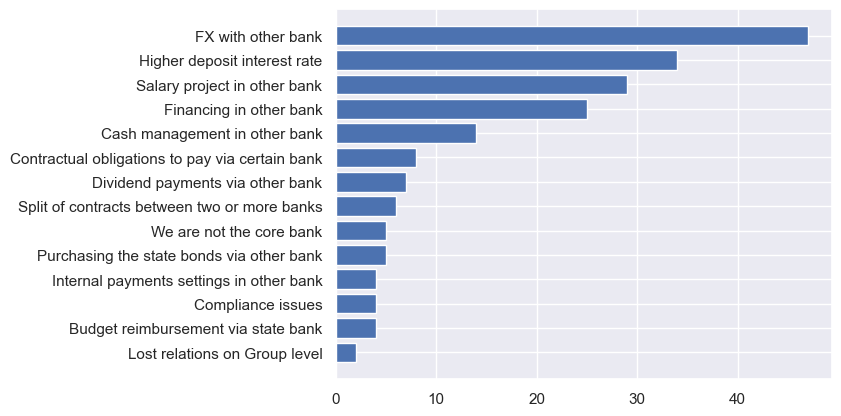

In [79]:
df_out_reason_group = df_out_reason.groupby('Reason').count()['Group'].reset_index()
df_out_reason_group = df_out_reason_group.sort_values('Group', ascending=True)

plt.barh(df_out_reason_group['Reason'], df_out_reason_group['Group'])
plt.show()

Let's leave only TOP 5 reasons and group the rest into 'Other' category for better visualization purpose.

In [80]:
# TOP 5 reasons
reason_group = df_out_reason_group.sort_values('Group', ascending=False).iloc[:5]

# grouping reasons
def reason_cat(x):
    if x in list(reason_group['Reason']):
        return x
    else:
        return 'Other*'
    
df_out_reason['Category'] = np.vectorize(reason_cat)(df_out_reason['Reason'])
df_out_reason.head()

,Group,Reason,Category
0,Group 1,Higher deposit interest rate,Higher deposit interest rate
1,Group 1,Purchasing the state bonds via other bank,Other*
2,Group 11,Cash management in other bank,Cash management in other bank
3,Group 112,FX with other bank,FX with other bank
4,Group 113,Salary project in other bank,Salary project in other bank


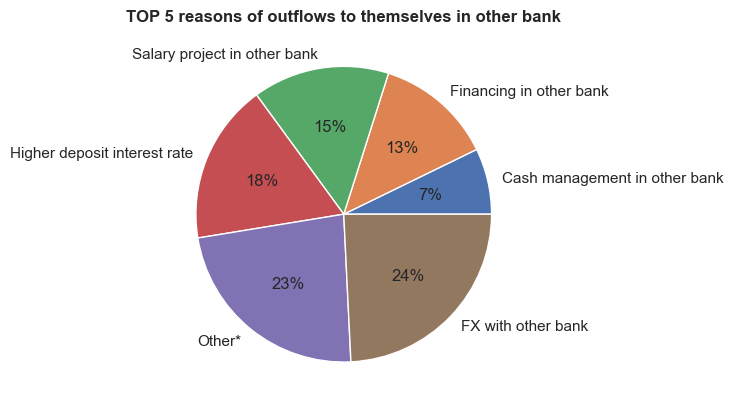

In [81]:
df_out_reason_category = df_out_reason.groupby('Category').count()['Group'].reset_index()
df_out_reason_category = df_out_reason_category.sort_values('Group', ascending=True)

plt.pie(df_out_reason_category['Group'], labels=df_out_reason_category['Category'], autopct='%0.0f%%')
plt.title('TOP 5 reasons of outflows to themselves in other bank', fontweight='bold')
plt.show()

<b>Ideas for money retention:</b><br>
1. compare clients' forex conditions (mark-up, fees) in our bank and others, offer new FX products & services(direct dealing service, appealing hedging solutions), simplify the control of client's foreign contracts;
2. review of deposits (term & demand) interest rates on case-by-case basis to find approaches of their increase for clients with big volumes at least;
3. analysis of clients' salary project conditions in other banks in order to make a more appealing offer in our bank;
4. analysis of clients' financing options & conditions in other banks and review our financing solutions that we can offer on case-by-case basis;
5. offer new cash management solutions;
6. also, it is worth informing clients that some of their counterparties are clients of our bank and can receive payments through their accounts here.<br>

<b>Ideas for further analysis:</b><br>
1. analysis of 249 deactivated clients (which deposit volumes decreased by over 20% during the last 2 years) on the reasons of their deposits reduction and finding the possible approaches of their reactivation;
2. analysis of 96 clients who received large percentage of money from their own accounts in other banks during 2019 in order to find approaches that would encourage them to use our bank as their main bank.

<a id='8.'></a>
# 8. Presenting the results
The final part of this analysis will be made in form of PowerPoint presentation and then presented to the stakeholders for further decision making. To do so, let's export some tables to Excel for further charts creation.

In [82]:
# object for exporting dataframes to a single Excel file
writer = pd.ExcelWriter('depo_analysis.xlsx')

# deposits overview
df_avg_year = df_avg_year.reset_index()
df_avg_year_uah = df_avg_year_uah.reset_index()
depos_str_evol_mon = df[df['cur'] == 'LCY'].groupby(['year', 'date_rep', 'portfolio', 'cur']).sum()['avg_deposit'].reset_index()
depos_str_evol_mon = depos_str_evol_mon.pivot(index=['year', 'date_rep', 'cur'], columns='portfolio', values='avg_deposit').reset_index()
depos_str_evol_mon['total'] = depos_str_evol_mon['Demand deposit'] + depos_str_evol_mon['Term deposit']
depos_str_evol_year = depos_str_evol_mon.groupby(['year', 'cur']).mean()[['Demand deposit', 'Term deposit', 'total']].reset_index()

df_avg_year.to_excel(writer, sheet_name='deposits overview', index=False)
df_avg_year_uah.to_excel(writer, sheet_name='deposits overview', index=False, startcol=df_avg_year.shape[1] + 2)
depos_str_evol_year.to_excel(writer, sheet_name='deposits overview', index=False, 
                             startcol=df_avg_year.shape[1] + df_avg_year_uah.shape[1] + 4)
depos_str_evol_mon.to_excel(writer, sheet_name='deposits overview', index=False, 
                             startcol=df_avg_year.shape[1] + df_avg_year_uah.shape[1] + depos_str_evol_year.shape[1] + 6)

# deposits evolution categories
categ_total = df_cli_change.groupby('category').agg({'absolute_change': ['sum', 'count']})

cli_cat_vis.to_excel(writer, sheet_name='deposits categories')
categ_total.to_excel(writer, sheet_name='deposits categories', startcol=cli_cat_vis.shape[1] + 3)

# incoming payments
in_categ = pd.concat([df_paym_in_cli_prev, df_paym_in_cli_cur])
in_paym = df_paym_in.groupby(['year', 'month']).sum()['uah_paym'].reset_index()

in_categ.to_excel(writer, sheet_name='inflows', index=False)
in_paym.to_excel(writer, sheet_name='inflows', index=False, startcol=in_categ.shape[1] + 2)
df_paym_in_type.to_excel(writer, sheet_name='inflows', startcol=in_categ.shape[1] + in_paym.shape[1] + 4)

# outgoin payments
out_categ = pd.concat([df_paym_out_cli_prev, df_paym_out_cli_cur])
out_paym = df_paym_out.groupby(['year', 'month']).sum()['uah_paym'].reset_index()

out_categ.to_excel(writer, sheet_name='outflows', index=False)
out_paym.to_excel(writer, sheet_name='outflows', index=False, startcol=out_categ.shape[1] + 2)
df_paym_out_type.to_excel(writer, sheet_name='outflows', startcol=out_categ.shape[1] + out_paym.shape[1] + 4)

# potential increase
depos_increase = df_avg_potential.pivot(['year', 'group', 'center', 'avg_deposit', 'tier'],
                                       columns='paym_type', values='avg_potential').reset_index()

depos_increase.to_excel(writer, sheet_name='potential increase', index=False)

# outflows reason
df_out_reason.to_excel(writer, sheet_name='top reasons', index=False)

writer.save()